## Census Income Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv(r'D:\Files\census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This data frame contains information related to **census income**. It contains **32560 rows and 15 columns** out of which **14 columns are inputs** and **1 column is target variable** i.e. **'Income' column**.  
  
The data frame contains both  **numeric and catagorical data**  
    
**Target variable has catagorical data,** thus it represents **Classification Problem**.  
  
**The goal is to predict whether a person makes over $50K a year.**   

In [3]:
#Checking data type of columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are **two types** of data present in this data frame which are **int64 and object**. **Majority** of the data types are **'object'**.

In [4]:
#checking for whitespace characters in columns of data frame
col=df.columns.tolist() #Storing columns name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable

for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [5]:
df.isnull().sum() #Checking if null values are present in data frame 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

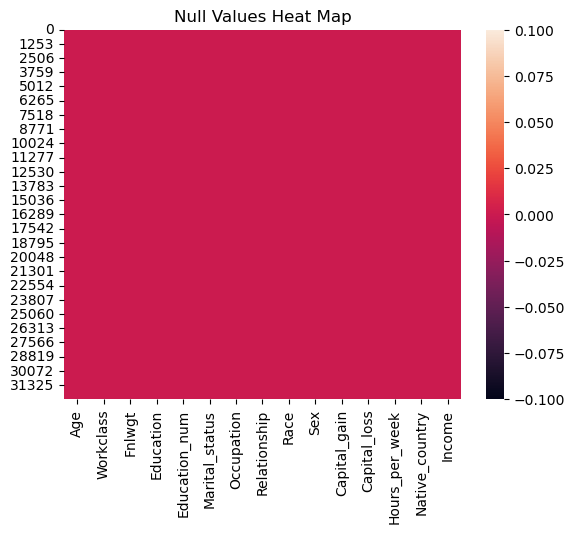

In [6]:
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that this data frame does not contains null values.

In [7]:
#creating a function named 'dup' to check for duplicate values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicate values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

Total duplicate values present in DataFrame are 24.


In [8]:
df.drop_duplicates(inplace=True)#dropping duplicate values

dup(df)#re-checking for duplicate values

This data frame does not contains duplicate values.


In [9]:
df.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


This shows **information** related to the **columns** and about their **Non-null count** and **Dtype.** It also shows the memory usage , which is **4.0+ MB** in this case.

In [10]:
#fetching details of columns, such as Unique values, Number of unique values and their value counts 
for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 Age :-
Unique values: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 
Number of unique values: 73 

     Value Counts
36           898
31           888
34           886
23           876
33           875
..           ...
83             6
88             3
85             3
86             1
87             1

[73 rows x 1 columns]

 Workclass :-
Unique values: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 
Number of unique values: 9 

                    Value Counts
 Private                  22673
 Self-emp-not-inc          2540
 Local-gov                 2093
 ?                         1836
 State-gov                 1297
 Self-emp-inc              1116
 Federal-gov                960
 Without-pay                 14
 Never-worked    

This gives a breif information about **unique values, count of unique values and value counts** of each column present in the data frame.  
  
**Target variable**'s data is **imbalanced** as there is high difference between the counts of values.

In [11]:
df.describe()#Using describe function on data frame

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


This gives the statistical information of the numerical columns. From the above description we can observe the following:   
  
1)There are no missing values.    
  
2)Mean is oddly greater than 50% in **'Capital_gain' and 'Capital_loss'** features which means that the data **might** be **skewed to the right** in these features.  
  
3)There is huge jump between max and 75% in **'Capital_gain' and 'Capital_loss'** features which means that there **might** be **outliers present** in these features.

In [12]:
#creating empty lists
cat_c=[]
num_c=[]

for i in col:#Iterating through 'col' list
    
    if df[i].dtypes=='object': #using if condition to check for 'object' data type
        cat_c.append(i)#appending 'i'
        
    elif df[i].dtypes=='int64': #using elif condition to check for 'int64' data types
        num_c.append(i)#appending 'i'

In [13]:
cat_c#checking contents of 'cat_c' list

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

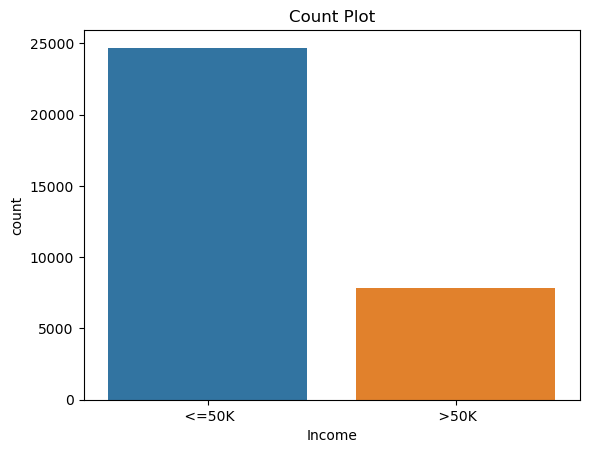

In [14]:
#checking count of values present in  target variable
sb.countplot(data=df,x='Income')
plt.title('Count Plot')
plt.show()

Majority of the people have less than or equal to 50k.

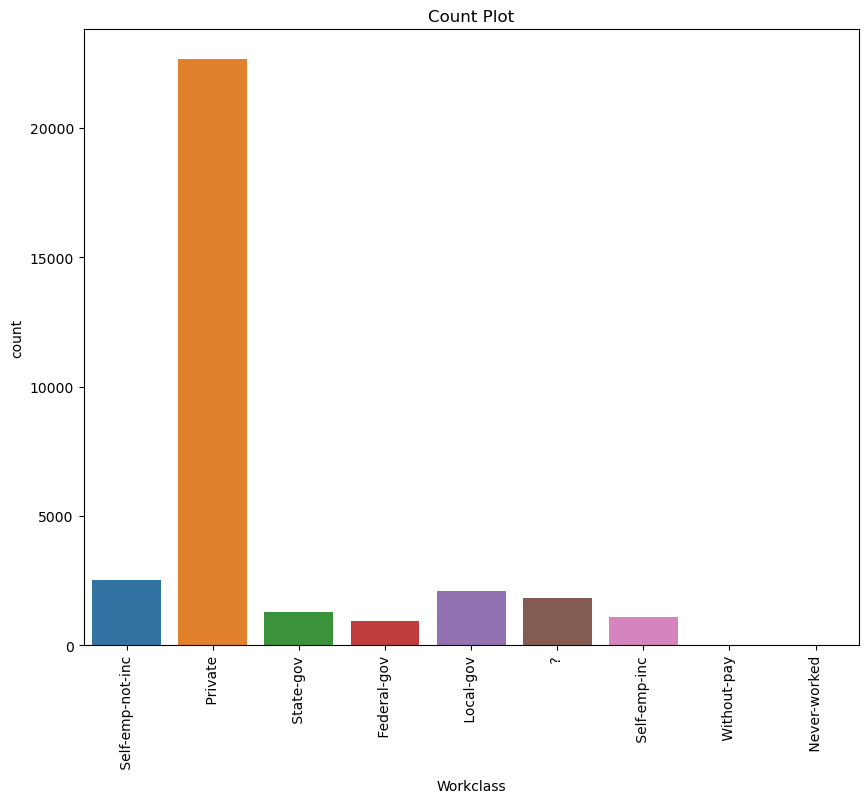

In [15]:
#checking count of values present in 'Workclass' feature
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='Workclass')
plt.xticks(rotation=90)
plt.title('Count Plot')
plt.show()

**Majority** of the people have **'Private' work class.**

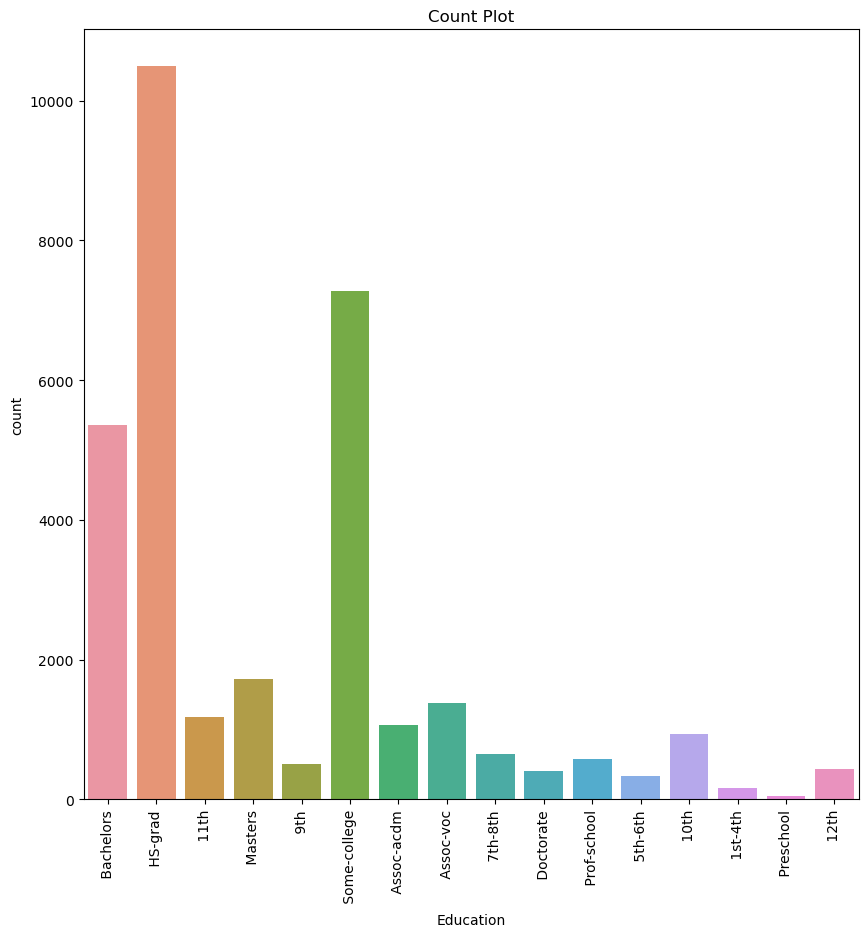

In [16]:
#checking count of values present in 'Education' feature
plt.figure(figsize=(10,10))
sb.countplot(data=df,x='Education')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Majority** of the people are **'HS-grand'**

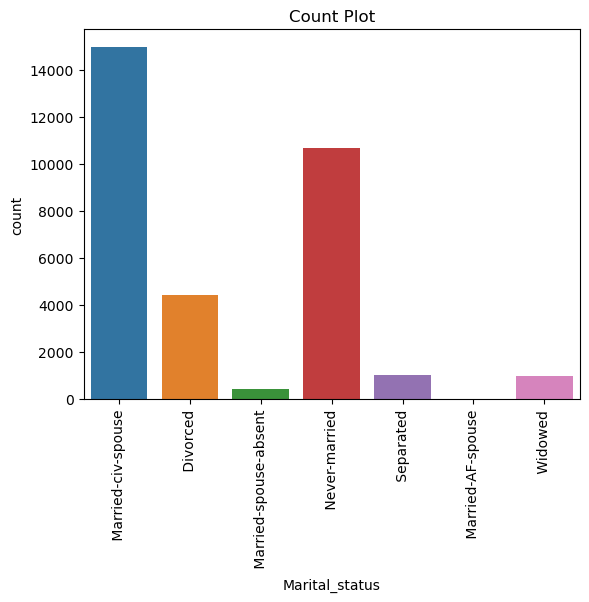

In [17]:
#checking count of values present in 'Marital_status' feature
sb.countplot(data=df,x='Marital_status')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Majority** of the people are **'Married-civ-spouse'**

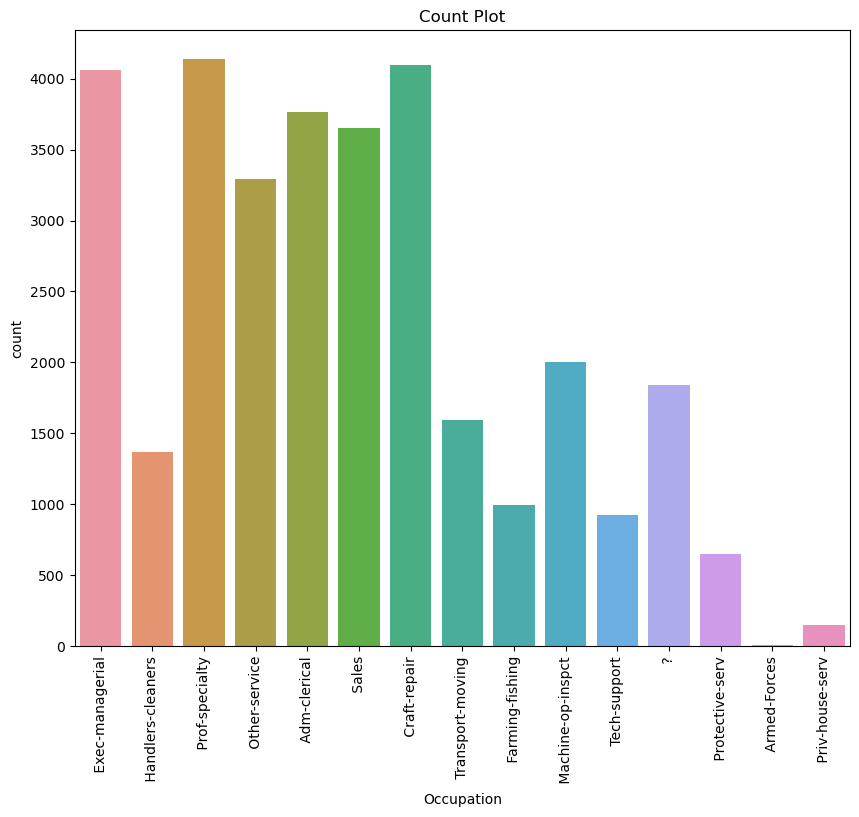

In [18]:
#checking count of values present in 'Occupation' feature
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='Occupation')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

Most of the people are in **'Exec-managerial', 'Prof-specialty', 'Craft-repair'** occupation.

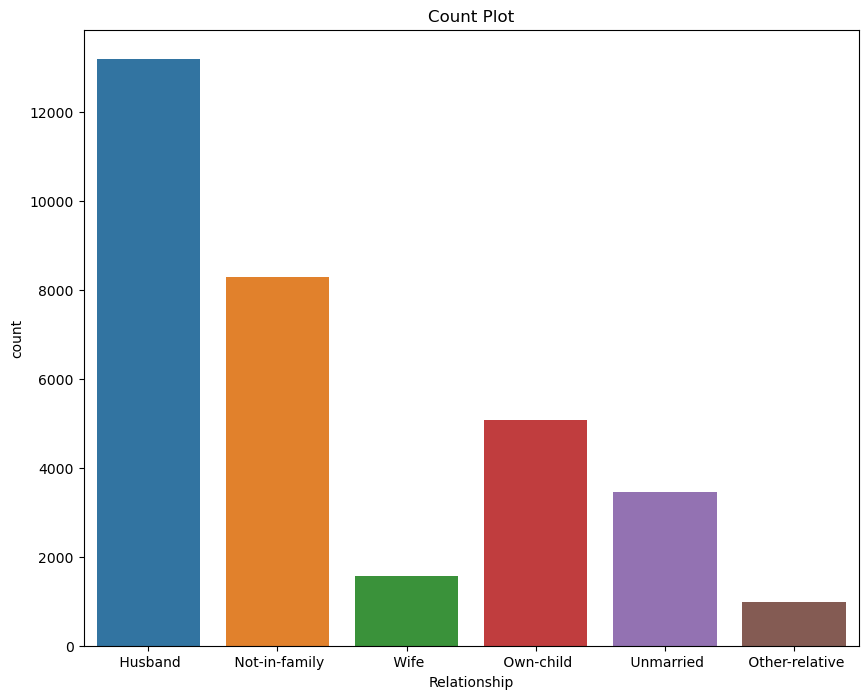

In [19]:
#checking count of values present in 'Relationship' feature
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='Relationship')
plt.title('Count Plot')
plt.show()

**Majority** of the people are in **'Husband'** relationship.

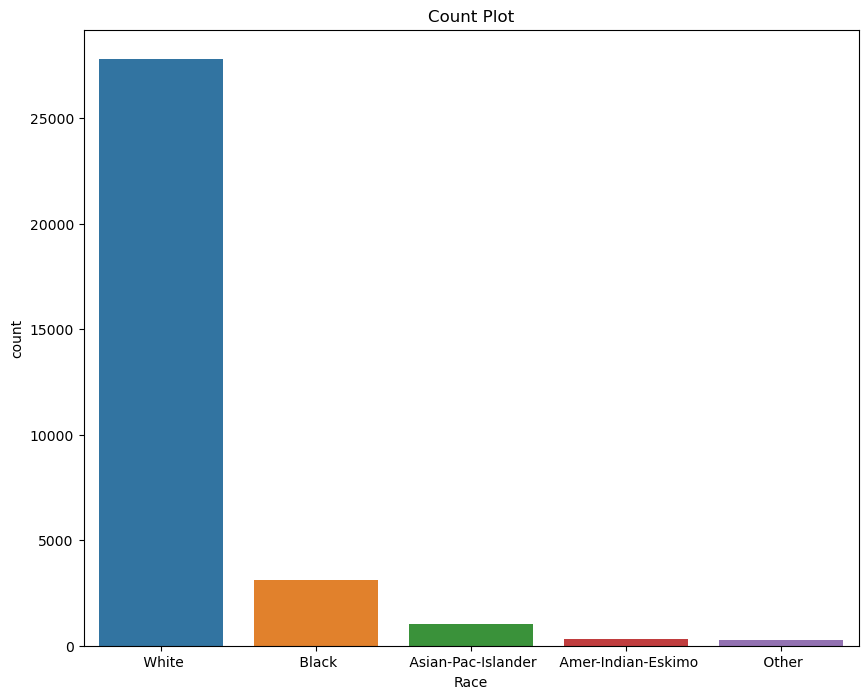

In [20]:
#checking count of values present in 'Race' feature
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='Race')
plt.title('Count Plot')
plt.show()

**Majority** of the people are of **'White'** race.

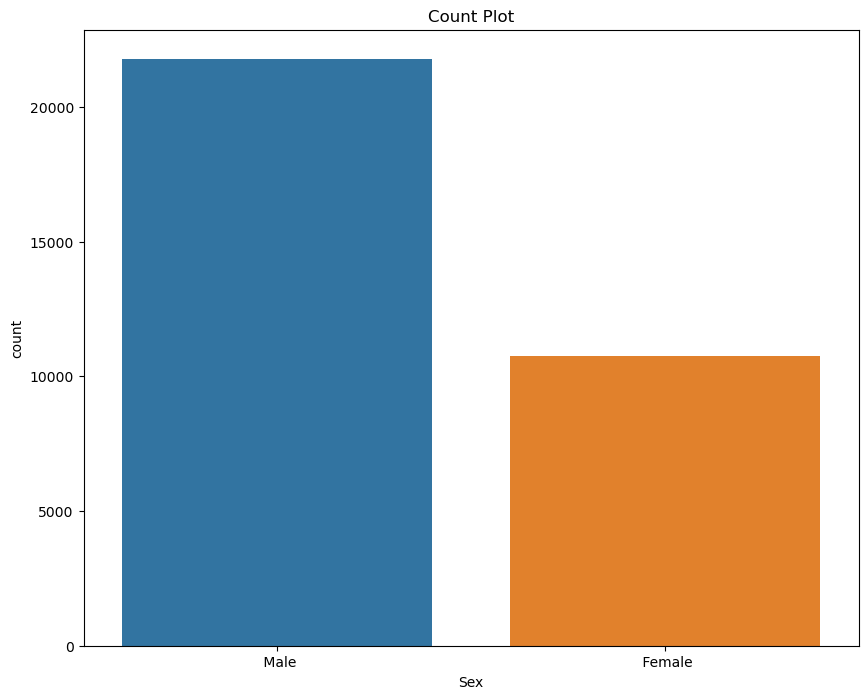

In [21]:
#checking count of values present in 'Sex' feature
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='Sex')
plt.title('Count Plot')
plt.show()

**Most** of the people are **'Male'.**

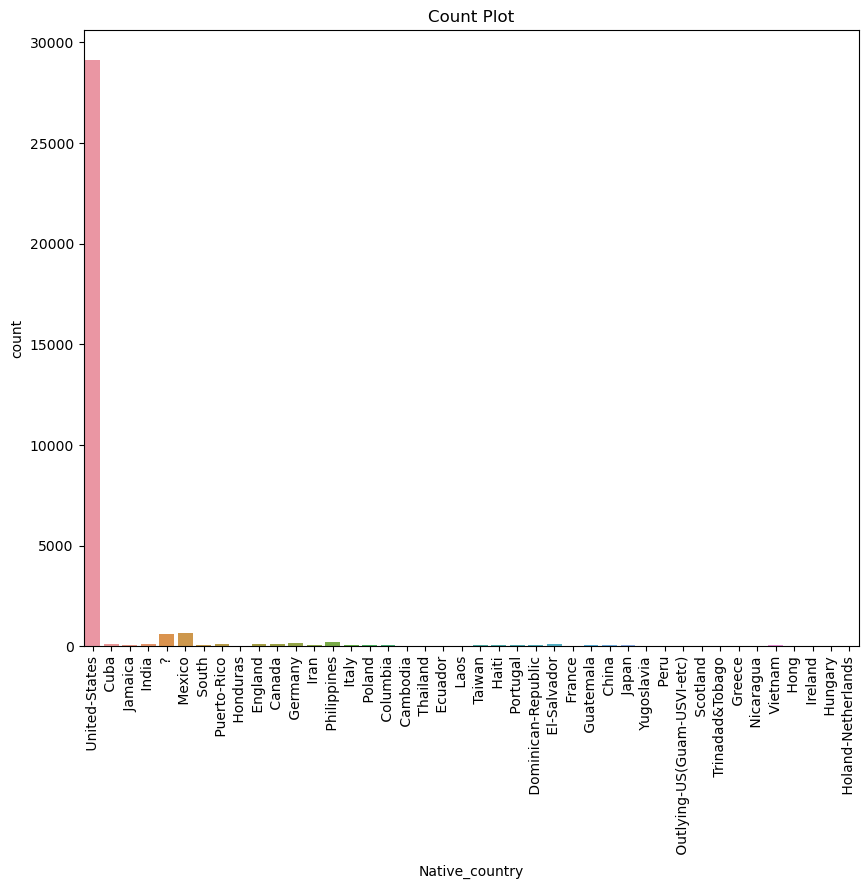

In [22]:
#checking count of values present in 'Native_country' feature
plt.figure(figsize=(10,8))
sb.countplot(data=df,x='Native_country')
plt.xticks(rotation=90)
plt.title('Count Plot')
plt.show()

Most of the people are from **'United-States'**. 

In [23]:
#checking contents of 'num_c' list
num_c

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [24]:
log=[]#creating empty list which is stored in 'log' variable 

def re():#creating a function named 're'
    
    for i in num_c:#iterating through 'num_c' variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=df,x=log[-1],y=i)
            plt.title('Linear Model Plot')
    plt.show()

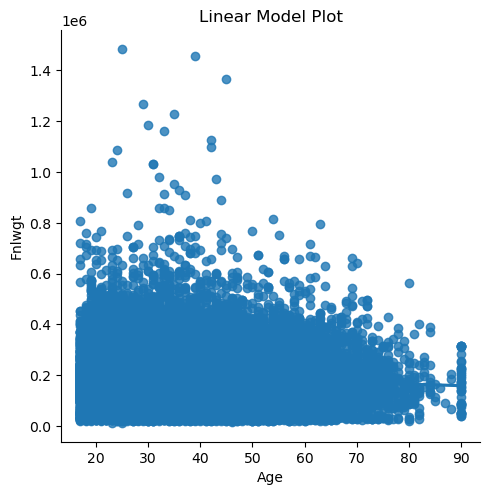

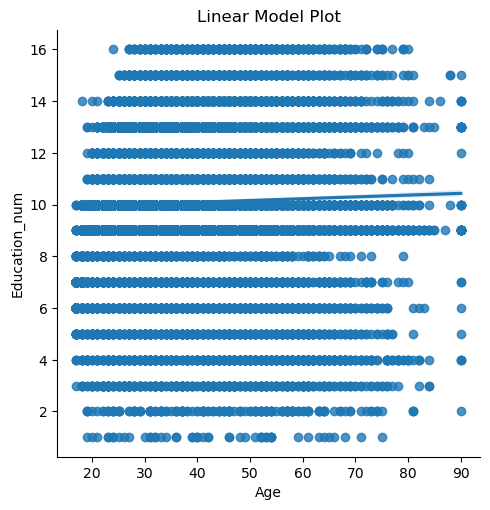

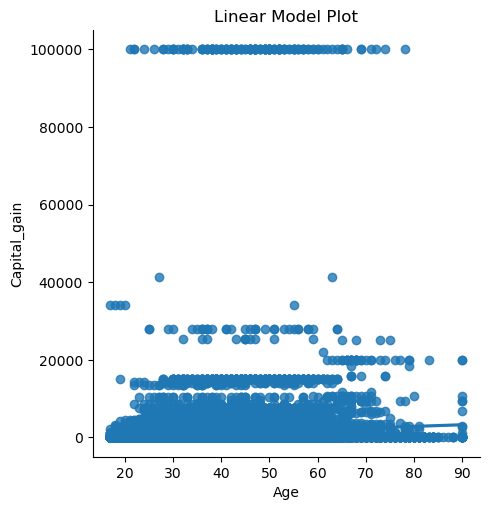

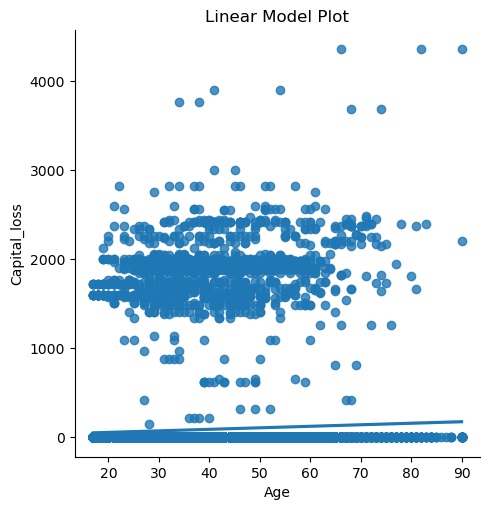

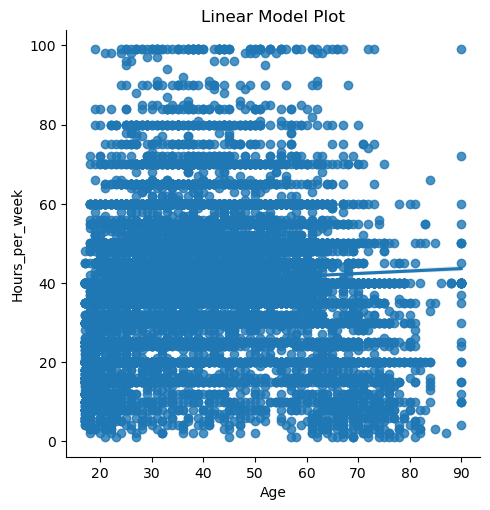

In [25]:
#checking linear relation of 'Age' feature with other features 
log.append('Age')#Appending feature
re()#calling function

**'Age'** feature has **almost no linear relation** with other remaining features.

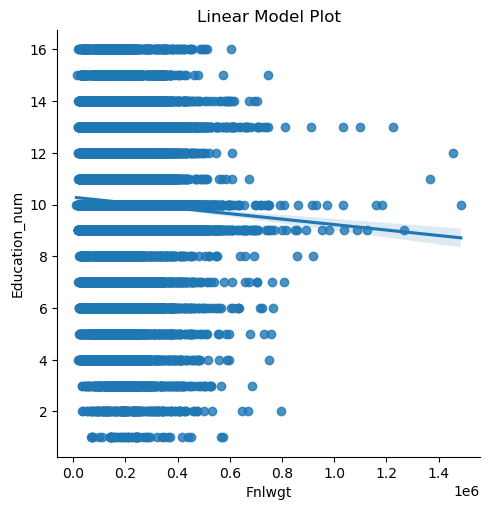

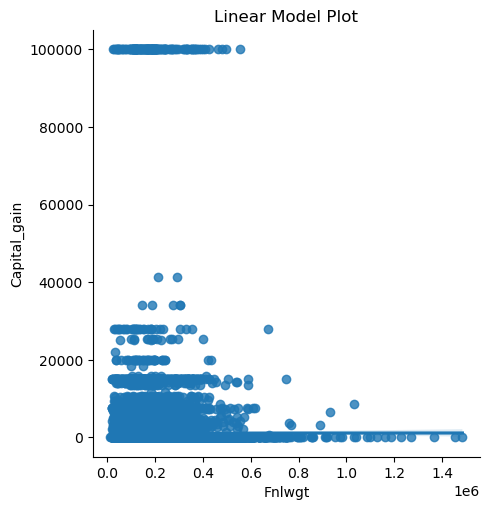

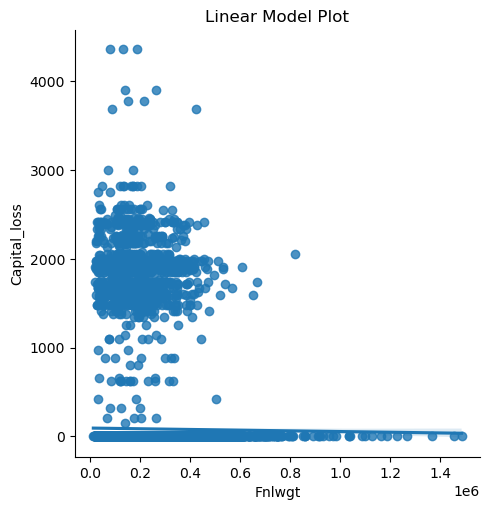

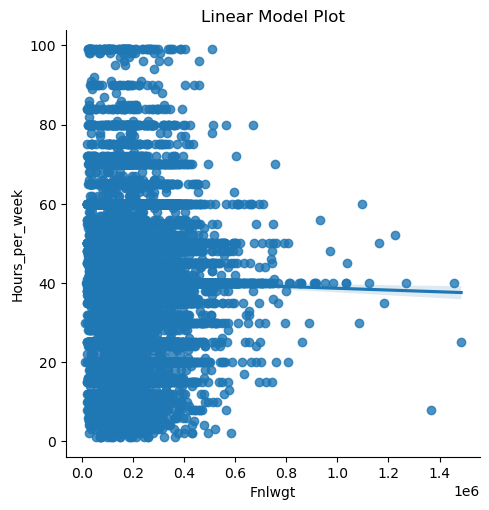

In [26]:
#checking linear relation of 'Fnlwgt' feature with other features 
log.append('Fnlwgt')#Appending feature
re()#calling function

**'Fnlwgt'** feature has **almost no linear relation** with other remaining features.

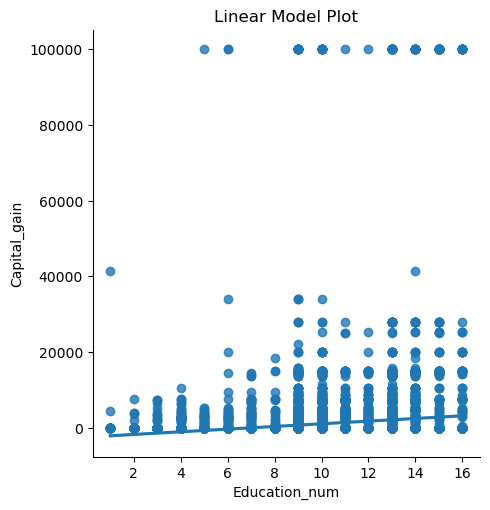

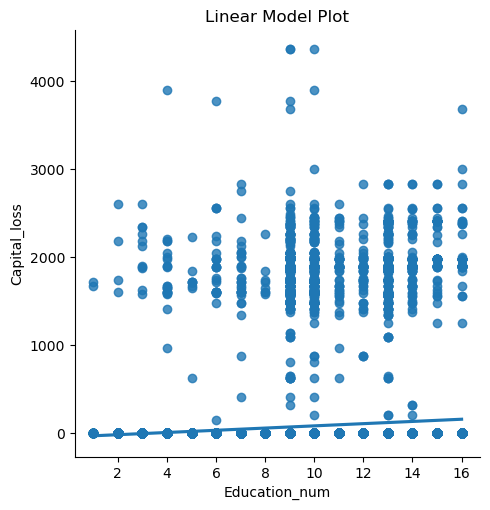

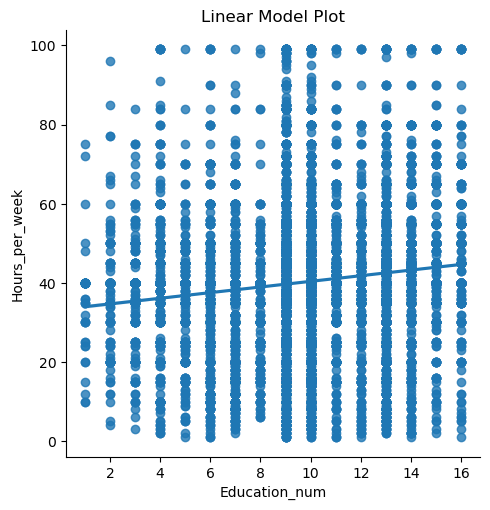

In [27]:
#checking linear relation of 'Education_num' feature with other features 
log.append('Education_num')#Appending feature
re()#calling function

**'Education_num'** feature has **almost no linear relation** with other remaining features.

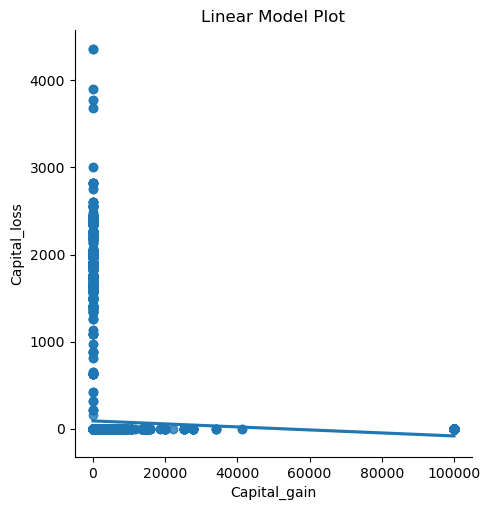

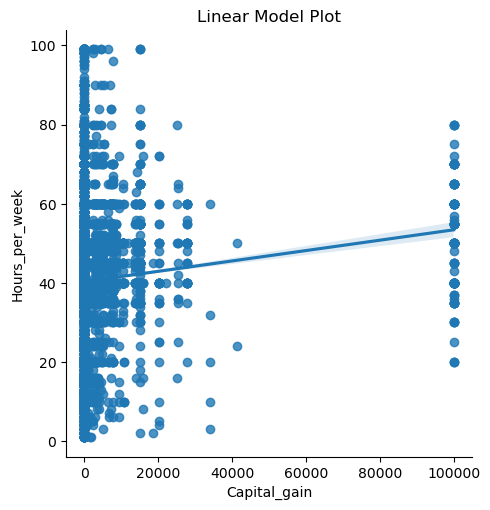

In [28]:
#checking linear relation of 'Capital_gain' feature with other features 
log.append('Capital_gain')#Appending feature
re()#calling function

**'Capital_gain'** feature has **almost no linear relation** with other remaining features.

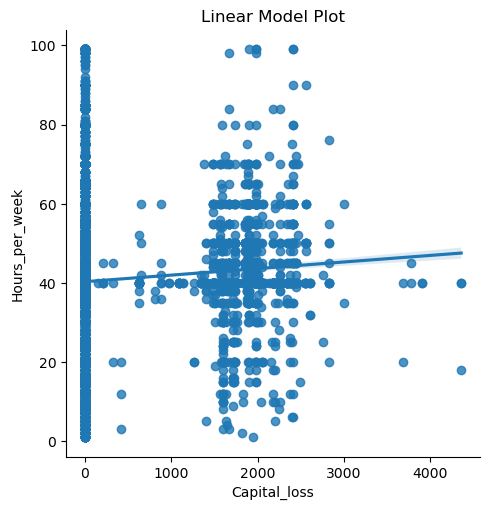

In [29]:
#checking linear relation between 'Capital_loss' and 'Hours_per_week' features
log.append('Capital_loss')#Appending feature
re()#calling function

**'Capital_loss' and 'Hours_per_week'** features have **almost no linear relation** with each other.

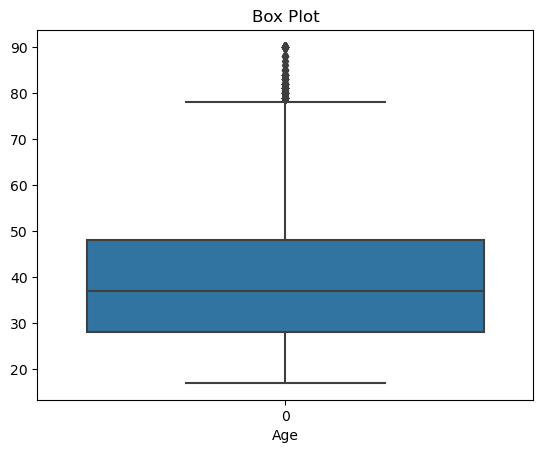

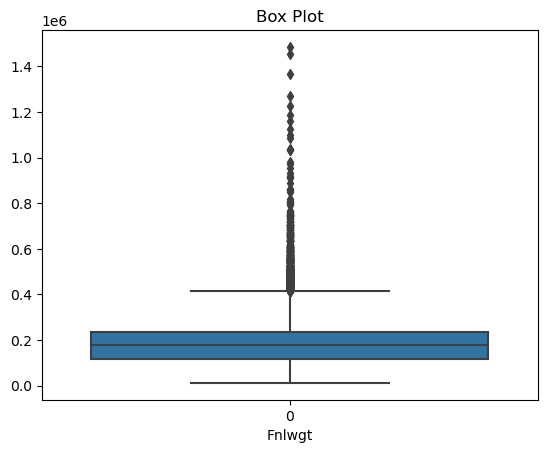

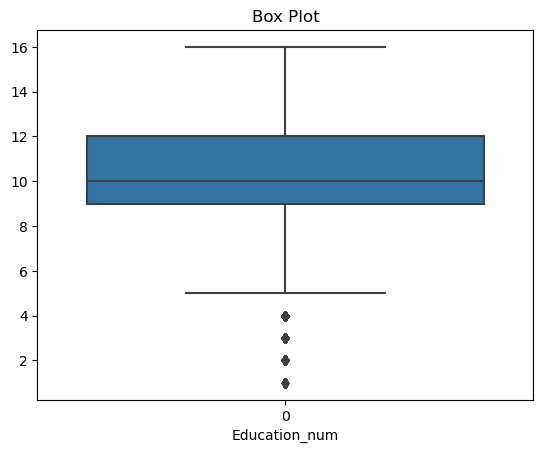

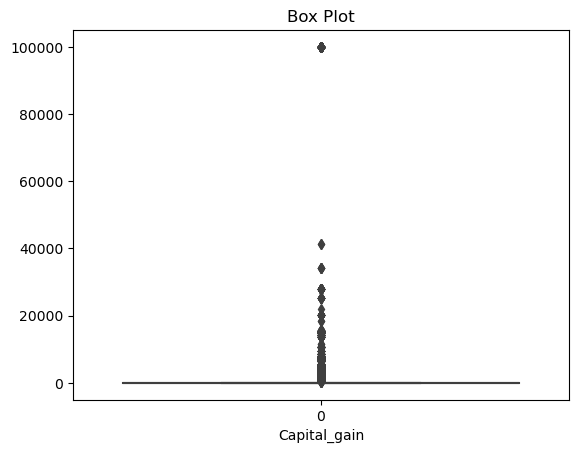

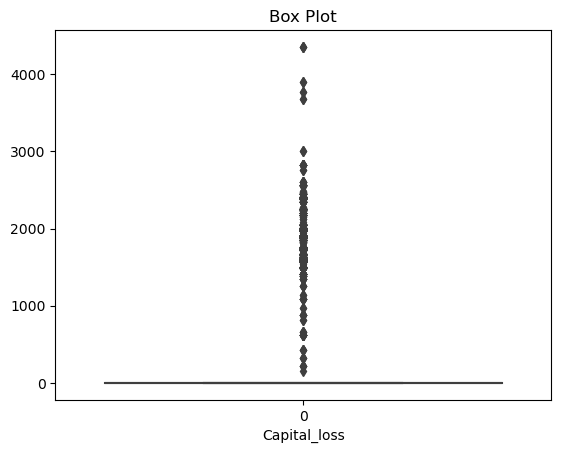

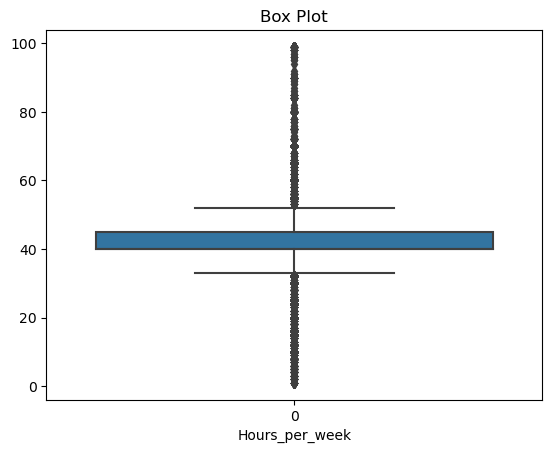

In [30]:
#Checking outliers via Box Plot
for i in num_c:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

All of these features contains outliers.

In [31]:
#removing outliers using zscore method
#Importing necessary libraries
from scipy.stats import zscore as zs

f_outlier=df[num_c]
z=np.abs(zs(f_outlier))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


The **variable 'z'** holds the **zscores values** of these features.

In [32]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [33]:
#checking value of the outliers
z.iloc[9,5]

3.204018209367117

In [34]:
z.iloc[22,4]

4.848974473866803

In [35]:
z.iloc[27,5]

3.204018209367117

We can confirm that these values holds outlier as per the threshold value.

In [36]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [37]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [38]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 8.384558642734202
Data loss percentage after removing outliers via IQR method 41.65539709859847


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [39]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 2728


In [40]:
df.shape#checking shape of data frame

(29808, 15)

Now the data frame has **29808 rows.**

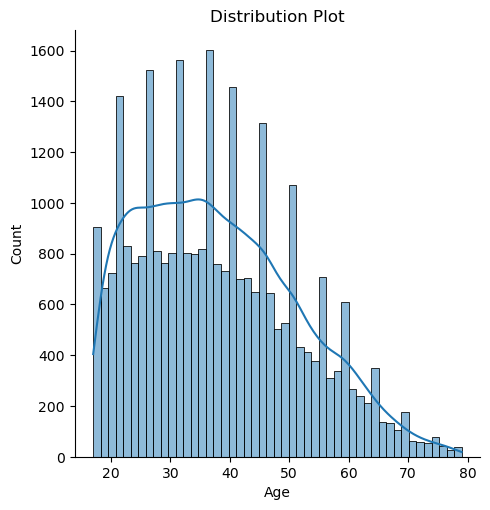

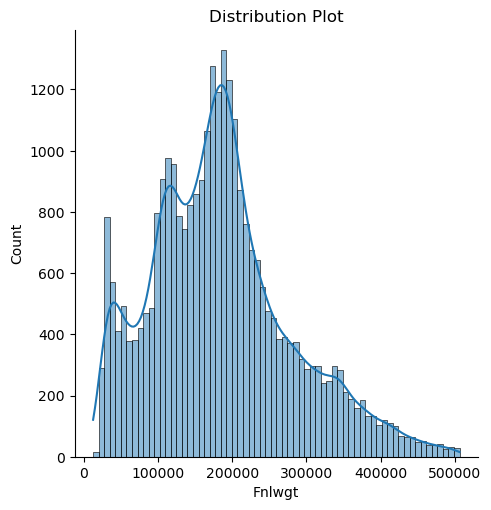

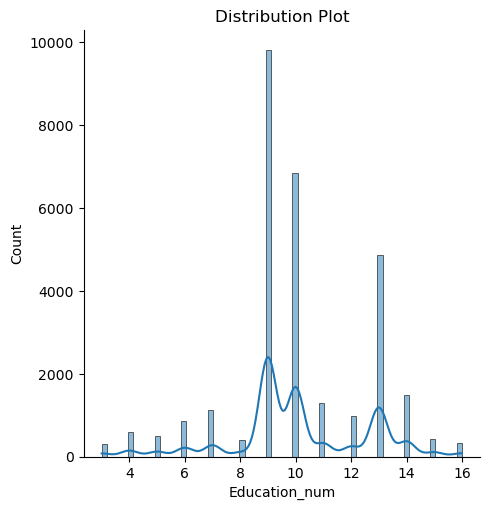

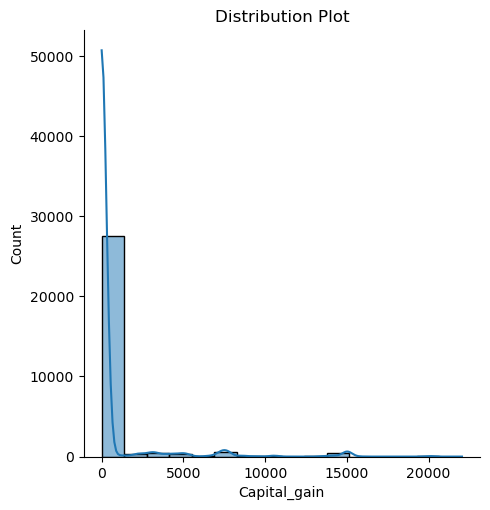

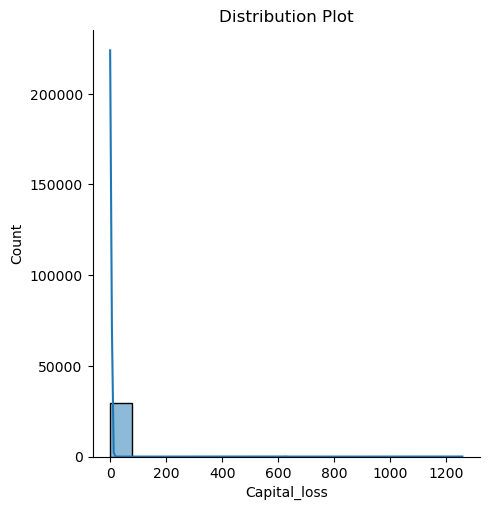

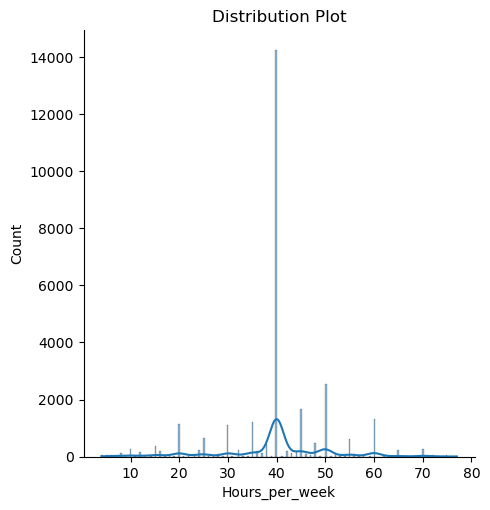

In [41]:
#checking distribution of columns
for i in num_c:
    sb.displot(df[i],kde=True)
    plt.title('Distribution Plot')    

**'Fnlwgt', 'Capital_gain' and 'Capital_loss'** features are **skewed to right**.

In [42]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

**'Fnlwgt', 'Capital_gain' and 'Capital_loss'** features are in **unacceptable range**, thus , we can use **yeojohnson method** to remove skewness.

In [43]:
from scipy.stats import yeojohnson as yj #importing library

a=['Fnlwgt', 'Capital_gain', 'Capital_loss']#creating list

for i in a:#iterating through 'a' list
    
    df[i],p=yj(df[i])

df.skew()

Age                0.491125
Fnlwgt            -0.034773
Education_num     -0.169811
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week    -0.353124
dtype: float64

Skewness is reduced, however, **'Capital_gain' and 'Capital_loss' features are in unacceptable range**, we can try square root method to remove skewness.

In [44]:
a=['Capital_gain', 'Capital_loss']#creating list

for i in a:#iterating through 'a' list
    
    df[i]=np.sqrt(df[i])
    
df.skew()

Age                0.491125
Fnlwgt            -0.034773
Education_num     -0.169811
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week    -0.353124
dtype: float64

**There is no change is skewness**, thus we can try **log + 1 method**.

In [45]:
for i in a:#iterating through 'a' list
    
    df[i]=np.log1p(df[i])
    
df.skew()

Age                0.491125
Fnlwgt            -0.034773
Education_num     -0.169811
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week    -0.353124
dtype: float64

**There is no change is skewness**, thus we can try **cuberoot method**.

In [46]:
for i in a:#iterating through 'a' list
    
    df[i]=np.cbrt(df[i])
    
df.skew()

Age                0.491125
Fnlwgt            -0.034773
Education_num     -0.169811
Capital_gain       3.072803
Capital_loss      24.860889
Hours_per_week    -0.353124
dtype: float64

**There is no change is skewness**,we have applied various applicable methods, thus we can **accept  these value as a threshold values**.

In [47]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,877.181963,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.000000,-0.0,13,United-States,<=50K
1,38,Private,1473.744573,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.000000,-0.0,40,United-States,<=50K
2,53,Private,1543.461718,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.000000,-0.0,40,United-States,<=50K
3,28,Private,1884.214293,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.000000,-0.0,40,Cuba,<=50K
4,37,Private,1714.396006,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.000000,-0.0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,1622.737360,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.000000,-0.0,38,United-States,<=50K
32556,40,Private,1228.138747,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.000000,-0.0,40,United-States,>50K
32557,58,Private,1217.406886,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.000000,-0.0,40,United-States,<=50K
32558,22,Private,1420.172016,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,-0.000000,-0.0,20,United-States,<=50K


In [48]:
for i in cat_c:#iterating through 'cat_c' list
    
    df[i]=le.fit_transform(df[i])#Transforming columns

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,877.181963,8,13,2,4,0,4,1,-0.000000,-0.0,13,38,0
1,38,4,1473.744573,10,9,0,6,1,4,1,-0.000000,-0.0,40,38,0
2,53,4,1543.461718,1,7,2,6,0,2,1,-0.000000,-0.0,40,38,0
3,28,4,1884.214293,8,13,2,10,5,2,0,-0.000000,-0.0,40,5,0
4,37,4,1714.396006,11,14,2,4,5,4,0,-0.000000,-0.0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,1622.737360,6,12,2,13,5,4,0,-0.000000,-0.0,38,38,0
32556,40,4,1228.138747,10,9,2,7,0,4,1,-0.000000,-0.0,40,38,1
32557,58,4,1217.406886,10,9,6,1,4,4,0,-0.000000,-0.0,40,38,0
32558,22,4,1420.172016,10,9,4,1,3,4,1,-0.000000,-0.0,20,38,0


All the catagorical data have been encoded. In **target variable**, **'0'** represents **"<=50K" and '1' represents '>50K'**.

In [49]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.008498,-0.067803,-0.004661,0.041431,-0.285335,-0.015931,-0.266802,0.027937,0.086589,0.121385,0.019600,0.091817,0.000011,0.239314
Workclass,0.008498,1.000000,-0.015161,0.022056,0.048848,-0.059397,0.251327,-0.089733,0.045840,0.092863,0.012249,-0.006062,0.126949,-0.006101,0.042179
Fnlwgt,-0.067803,-0.015161,1.000000,-0.023056,-0.035792,0.027875,-0.000519,0.009995,-0.007619,0.024742,-0.003625,-0.000034,-0.016348,-0.054846,-0.005765
Education,-0.004661,0.022056,-0.023056,1.000000,0.361097,-0.037416,-0.022595,-0.012924,0.015588,-0.027878,0.017770,-0.001080,0.060787,0.060242,0.074621
Education_num,0.041431,0.048848,-0.035792,0.361097,1.000000,-0.059092,0.108343,-0.096694,0.028587,0.009276,0.105265,0.008952,0.150713,0.026192,0.318731
Marital_status,-0.285335,-0.059397,0.027875,-0.037416,-0.059092,1.000000,-0.007189,0.184713,-0.066169,-0.123350,-0.063944,-0.017029,-0.195162,-0.021221,-0.194355
Occupation,-0.015931,0.251327,-0.000519,-0.022595,0.108343,-0.007189,1.000000,-0.074075,0.006637,0.081435,0.014230,0.001064,0.069887,-0.012224,0.069770
Relationship,-0.266802,-0.089733,0.009995,-0.012924,-0.096694,0.184713,-0.074075,1.000000,-0.116226,-0.577197,-0.081244,0.036363,-0.257798,-0.004903,-0.245913
Race,0.027937,0.045840,-0.007619,0.015588,0.028587,-0.066169,0.006637,-0.116226,1.000000,0.089914,0.024403,-0.000896,0.045400,0.136140,0.071755
Sex,0.086589,0.092863,0.024742,-0.027878,0.009276,-0.123350,0.081435,-0.577197,0.089914,1.000000,0.064220,-0.033094,0.233755,-0.008376,0.209946


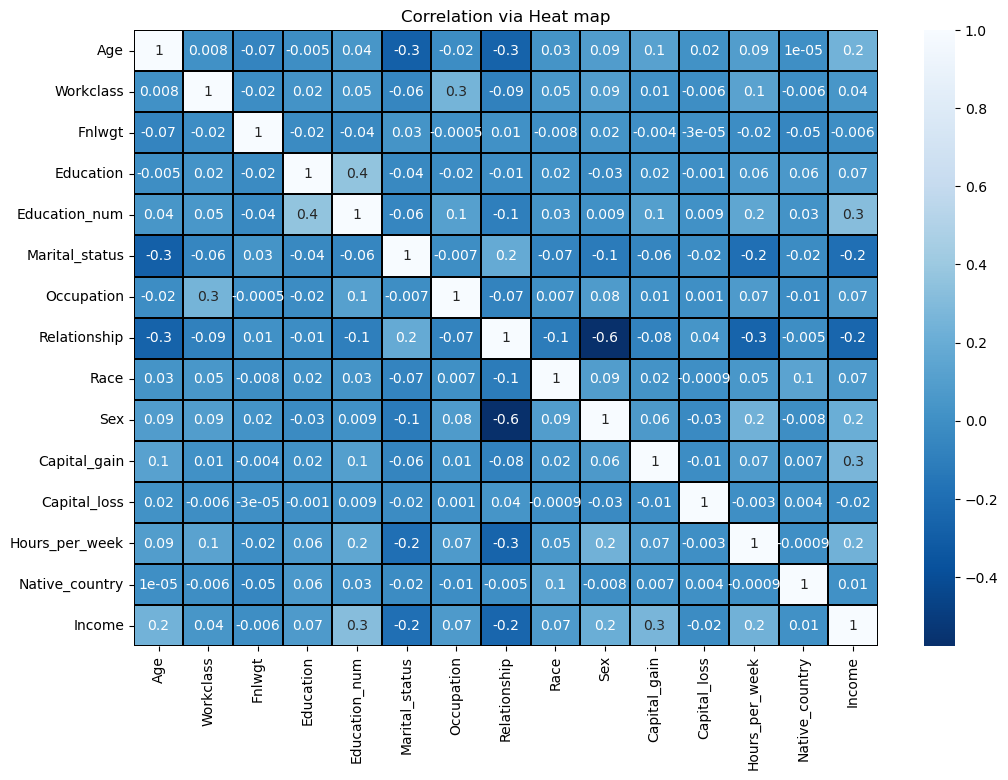

In [50]:
#Visualizing correlation via heat map
plt.figure(figsize=(12,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
  
1)**Most features** have **very low correlation** with **target variable.** 
  
2)**'Fnlwgt', 'Martial_status', 'Relationship' and  'Capital_loss'** features have **low negative correlation** with **target variable.**  
  
3)**'Age', 'Workclass', 'Education', 'Education_num', 'Occupation', 'Race', 'Sex', 'Capital_gain', 'Hours_per_week' and 'Native_country'** features have **low positive correlation** with **target variable.**  
   

In [51]:
#Separating features and target variable 
x=df.drop('Income',axis=1)
y=df['Income']    

In [52]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (29808, 14) 
Dimensions of label: (29808,)


We can observe that both features and lable have **same number of rows**.  
'x' contains 14 features.

In [53]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887304,1.474823,-1.114017,-0.340122,1.191227,-0.410260,-0.603110,-0.919032,0.393999,0.716254,-0.296786,-0.040161,-2.415235,0.286656
1,-0.011046,0.093645,0.425181,0.249488,-0.439623,-1.730676,-0.130913,-0.297940,0.393999,0.716254,-0.296786,-0.040161,0.009070,0.286656
2,1.111891,0.093645,0.605059,-2.403756,-1.255048,-0.410260,-0.130913,-0.919032,-1.956981,0.716254,-0.296786,-0.040161,0.009070,0.286656
3,-0.759670,0.093645,1.484239,-0.340122,1.191227,-0.410260,0.813482,2.186429,-1.956981,-1.396153,-0.296786,-0.040161,0.009070,-4.108664
4,-0.085908,0.093645,1.046089,0.544293,1.598939,-0.410260,-0.603110,2.186429,0.393999,-1.396153,-0.296786,-0.040161,0.009070,0.286656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.834532,0.093645,0.809600,-0.929731,0.783514,-0.410260,1.521779,2.186429,0.393999,-1.396153,-0.296786,-0.040161,-0.170508,0.286656
29804,0.138679,0.093645,-0.208509,0.249488,-0.439623,-0.410260,0.105186,-0.919032,0.393999,0.716254,-0.296786,-0.040161,0.009070,0.286656
29805,1.486203,0.093645,-0.236198,0.249488,-0.439623,2.230572,-1.311406,1.565337,0.393999,-1.396153,-0.296786,-0.040161,0.009070,0.286656
29806,-1.208844,0.093645,0.286958,0.249488,-0.439623,0.910156,-1.311406,0.944244,0.393999,0.716254,-0.296786,-0.040161,-1.786711,0.286656


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [54]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.176795,Age
1,1.088161,Workclass
2,1.010230,Fnlwgt
3,1.161949,Education
4,1.209668,Education_num
5,1.137294,Marital_status
6,1.089127,Occupation
7,1.674407,Relationship
8,1.037546,Race
9,1.548467,Sex


There is no problem of multicollinearity.

In [55]:
y.value_counts()#checking value counts of 'y'

0    23156
1     6652
Name: Income, dtype: int64

This shows that this data is imbalanced , to balance data, we can use oversampling method.

In [56]:
#oversampling the data
from imblearn.over_sampling import SMOTE #importing necessary library

sm=SMOTE()#creating instance

x1,y1=sm.fit_resample(x,y)#sampling data

In [57]:
y1.value_counts()#checking value counts of 'y1'

0    23156
1    23156
Name: Income, dtype: int64

The data is balanced now.

In [58]:
#checking number of sampled data  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])#printing

#Updating features and label
x=x1
y=y1

Dimensions of features before sampling: 29808 
Dimensions of label before sampling: 29808 
Dimensions of features after sampling: 46312 
Dimensions of label after sampling: 46312 
Differnce =  16504


In [59]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier

In [60]:
#Finding best random state on Random Forest Classifier
ac_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,46):#running 'if' loop for 45 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    RFR=RandomForestClassifier()#creating instance
    
    RFR.fit(x_train,y_train)#fitting data
    pr=RFR.predict(x_test)#predicting data
    
    ac=accuracy_score(y_test,pr)#calculating accuracy score 
    
    if ac>ac_updater:#using if condition to update 'ac_updater' and 'rs_updater' only if 'ac' is greater than 'ac_updater'
        #updating values
        ac_updater=ac
        rs_updater=i

print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)#printing

Max accuracy score during the iteration is  0.9042032532028214 on randome state :  17


In [61]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [62]:
#Creating instance of  various models
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity
    
for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data 
    pr=i.predict(x_test)#predicting data
    
    A_score=accuracy_score(y_test,pr)#calculating accuracy  score
    C_matrix=confusion_matrix(y_test,pr)#calculating confusion matrix
    C_report=classification_report(y_test,pr)#calculating classification report
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(A_score - score.mean())*100  #calculating difference of accuracy score and Cross Validation Score
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','\nConfusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\nClassification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.7663739743774292 
 
Confusion matrix of LogisticRegression :
 [[5219 1663]
 [1583 5429]] 
Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      6882
           1       0.77      0.77      0.77      7012

    accuracy                           0.77     13894
   macro avg       0.77      0.77      0.77     13894
weighted avg       0.77      0.77      0.77     13894
 


Cross validation Score of LogisticRegression is [0.75666631 0.76098456 0.76560138 0.75987908 0.76732887] 
Mean:  0.7620920394975372 
Difference between Accuracy score and cross validation is  0.42819348798919243

 Accuracy score of RandomForestClassifier is 0.9017561537354254 
 
Confusion matrix of RandomForestClassifier :
 [[6141  741]
 [ 624 6388]] 
Classification report of  RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.91    

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that **RandomForestClassifier is the best performing model** as it has the least difference between accuracy score and cross validation than the rest of the models.

In [64]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'n_estimators':[50,100,150],'criterion':['gini','entropy','log_los'],'min_samples_split': [2, 5, 10],'max_features':['sqrt', 'log2', None]}#defining hyper parameters

gsc=GSC(RFC,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters 

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 150}

In [66]:
#Applying best parameters provided by GridSearchCV
final=RandomForestClassifier(n_estimators=150,criterion='gini',min_samples_split=2,max_features='log2')

In [67]:
final.fit(x_train,y_train)#fitting data 
pr=final.predict(x_test)#predicting data

ac=accuracy_score(y_test,pr)
print(ac)

0.9016841802216784


Model's accuracy score is increased from 90% to 90.1%

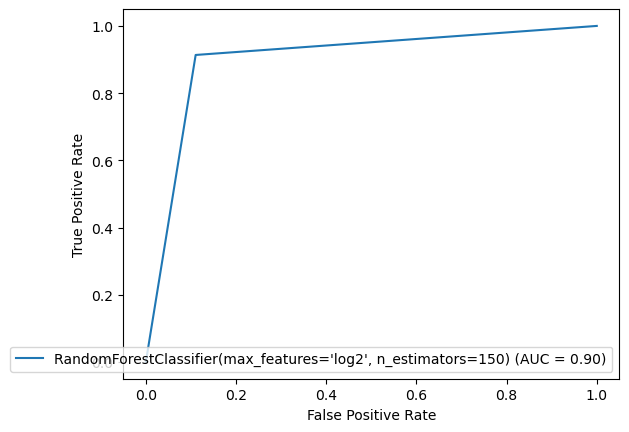

In [68]:
#Ploting roc curve
#Importing necessary libraries
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test,pr)#Calculating ROC curve values
roc_auc=auc(fpr,tpr)#calculating AUC
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)#Creating a ROC curve display
display.plot()
plt.show()

**AUC** value is **0.90**, which means the model **performs excellent** in **distinguishing between the classes**.

In [72]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

#creating new data frame with Predicted and Original values
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})

In [73]:
#replacing encoding values with original values
conclusion.replace(1,'>50K',inplace=True)
conclusion.replace(0,'<=50K',inplace=True)

In [74]:
conclusion.sample(20)

,Predicted Values,Original Values
26543,<=50K,<=50K
32448,>50K,>50K
15246,>50K,>50K
16254,>50K,>50K
23948,>50K,<=50K
28445,<=50K,<=50K
12259,>50K,<=50K
17832,>50K,>50K
33673,>50K,>50K
8758,<=50K,<=50K


Here we can conclude that the model's overall **predicted values are close to original values.**

In [75]:
#Saving the model
import joblib#importing library
joblib.dump(final,r'D:\Models\CI.obj')#saving model into desired path

['D:\\Models\\CI.obj']